In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [3]:
df_amazon = pd.read_csv('amazon_complete_table.csv')
df_amazon

,file_name,intonations,duration,intonation_per_15,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,isAd,authorStats_followingCount,authorStats_followerCount,authorStats_likeCount
0,7236516655826750725_pitch_values,9,12.629093,10.689604,7236516655826750725,Anya,anya.bumag,2295,20,6833,773,179200,12,NaN,278,818700,21800000
1,7310344854129642757_pitch_values,153,82.376032,27.860046,7310344854129642757,Sam Shan Shops 🦋,sam.shan.shops,401100,4111,1100000,110600,15800000,82,NaN,937,1100000,41300000
2,7185585185465879854_pitch_values,54,35.616848,22.742046,7185585185465879854,Jared Andersen,stuffyouactuallyneed,1381,37,10100,377,131000,35,NaN,1083,1400000,65700000
3,7171239119006387502_pitch_values,11,18.062562,9.134917,7171239119006387502,Justice Buys,justicebuys,14600,217,86000,2344,1800000,18,NaN,66,1200000,36600000
4,7254545022639426822_pitch_values,68,47.554807,21.448936,7254545022639426822,Sam Shan Shops 🦋,sam.shan.shops,23200,325,91300,11100,2200000,47,NaN,937,1100000,41300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7021521007458503942_pitch_values,22,17.461746,18.898454,7021521007458503942,Sarah Lindner,thehouseofsequins,73,3,910,50,21200,17,NaN,27,417300,14300000
96,7158836355827617029_pitch_values,24,26.839705,13.412964,7158836355827617029,Sam Shan Shops 🦋,sam.shan.shops,1001,26,3989,195,84400,26,NaN,937,1100000,41300000
97,7017066328842358021_pitch_values,24,19.133583,18.815086,7017066328842358021,Sarah Lindner,thehouseofsequins,71,2,1063,38,18100,19,NaN,27,417300,14300000
98,7217975957972356357_pitch_values,7,14.640522,7.171876,7217975957972356357,Anya,anya.bumag,2406,21,8653,619,232000,14,NaN,278,818700,21800000


In [7]:
#df_amazon drop isAd
df_amazon = df_amazon.drop(['isAd'], axis=1)

#rename authorStats_likeCount to authorStats_heartCount
df_amazon = df_amazon.rename(columns={'authorStats_likeCount': 'authorStats_heartCount'})

df_amazon

,file_name,intonations,duration,intonation_per_15,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,authorStats_followingCount,authorStats_followerCount,authorStats_heartCount
0,7236516655826750725_pitch_values,9,12.629093,10.689604,7236516655826750725,Anya,anya.bumag,2295,20,6833,773,179200,12,278,818700,21800000
1,7310344854129642757_pitch_values,153,82.376032,27.860046,7310344854129642757,Sam Shan Shops 🦋,sam.shan.shops,401100,4111,1100000,110600,15800000,82,937,1100000,41300000
2,7185585185465879854_pitch_values,54,35.616848,22.742046,7185585185465879854,Jared Andersen,stuffyouactuallyneed,1381,37,10100,377,131000,35,1083,1400000,65700000
3,7171239119006387502_pitch_values,11,18.062562,9.134917,7171239119006387502,Justice Buys,justicebuys,14600,217,86000,2344,1800000,18,66,1200000,36600000
4,7254545022639426822_pitch_values,68,47.554807,21.448936,7254545022639426822,Sam Shan Shops 🦋,sam.shan.shops,23200,325,91300,11100,2200000,47,937,1100000,41300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7021521007458503942_pitch_values,22,17.461746,18.898454,7021521007458503942,Sarah Lindner,thehouseofsequins,73,3,910,50,21200,17,27,417300,14300000
96,7158836355827617029_pitch_values,24,26.839705,13.412964,7158836355827617029,Sam Shan Shops 🦋,sam.shan.shops,1001,26,3989,195,84400,26,937,1100000,41300000
97,7017066328842358021_pitch_values,24,19.133583,18.815086,7017066328842358021,Sarah Lindner,thehouseofsequins,71,2,1063,38,18100,19,27,417300,14300000
98,7217975957972356357_pitch_values,7,14.640522,7.171876,7217975957972356357,Anya,anya.bumag,2406,21,8653,619,232000,14,278,818700,21800000


In [10]:
#add a column genre to the dataframe and fill all the rows with the value 'amazon'
df_amazon['genre'] = 'amazon'
df_amazon

,file_name,intonations,duration,intonation_per_15,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,authorStats_followingCount,authorStats_followerCount,authorStats_heartCount,genre
0,7236516655826750725_pitch_values,9,12.629093,10.689604,7236516655826750725,Anya,anya.bumag,2295,20,6833,773,179200,12,278,818700,21800000,amazon
1,7310344854129642757_pitch_values,153,82.376032,27.860046,7310344854129642757,Sam Shan Shops 🦋,sam.shan.shops,401100,4111,1100000,110600,15800000,82,937,1100000,41300000,amazon
2,7185585185465879854_pitch_values,54,35.616848,22.742046,7185585185465879854,Jared Andersen,stuffyouactuallyneed,1381,37,10100,377,131000,35,1083,1400000,65700000,amazon
3,7171239119006387502_pitch_values,11,18.062562,9.134917,7171239119006387502,Justice Buys,justicebuys,14600,217,86000,2344,1800000,18,66,1200000,36600000,amazon
4,7254545022639426822_pitch_values,68,47.554807,21.448936,7254545022639426822,Sam Shan Shops 🦋,sam.shan.shops,23200,325,91300,11100,2200000,47,937,1100000,41300000,amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7021521007458503942_pitch_values,22,17.461746,18.898454,7021521007458503942,Sarah Lindner,thehouseofsequins,73,3,910,50,21200,17,27,417300,14300000,amazon
96,7158836355827617029_pitch_values,24,26.839705,13.412964,7158836355827617029,Sam Shan Shops 🦋,sam.shan.shops,1001,26,3989,195,84400,26,937,1100000,41300000,amazon
97,7017066328842358021_pitch_values,24,19.133583,18.815086,7017066328842358021,Sarah Lindner,thehouseofsequins,71,2,1063,38,18100,19,27,417300,14300000,amazon
98,7217975957972356357_pitch_values,7,14.640522,7.171876,7217975957972356357,Anya,anya.bumag,2406,21,8653,619,232000,14,278,818700,21800000,amazon


In [4]:
df_bookrecs = pd.read_csv('bookrecs_complete_table.csv')
df_bookrecs

,file_name,intonations,duration,intonation_per_15,id,author_uniqueId,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,authorStats_followingCount,authorStats_followerCount,authorStats_heartCount,authorStats_videoCount,authorStats_diggCount
0,7306201830168481054_pitch_values,82,150.372766,8.179673,7306201830168481054,delaneylynnesmith,148800.0,4949.0,1365.0,2100000.0,71900.0,255.0,279600.0,7200000.0,958.0,1696.0
1,7320782185550679338_pitch_values,59,199.561338,4.434727,7320782185550679338,alyssaathenaa,25800.0,148.0,257.0,235900.0,11000.0,326.0,47200.0,1000000.0,269.0,14300.0
2,7288699360202820870_pitch_values,49,91.623379,8.021970,7288699360202820870,olive.library,8428.0,67.0,73.0,143000.0,4567.0,388.0,20200.0,1700000.0,454.0,12400.0
3,7319647306595257642_pitch_values,4,15.476440,3.876861,7319647306595257642,sinisterbookrecs,576800.0,25400.0,2960.0,5000000.0,141500.0,49.0,30000.0,733700.0,689.0,791.0
4,7376083784275332398_pitch_values,50,89.820930,8.349947,7376083784275332398,jolie_reads,45100.0,749.0,200.0,365900.0,13000.0,832.0,260500.0,7100000.0,1211.0,15100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,7394558056274709803_pitch_values,31,53.876440,8.630860,7394558056274709803,jacob_elijah_,486.0,7.0,359.0,4870.0,72.0,430.0,8409.0,113100.0,163.0,199200.0
71,7278439753203207467_pitch_values,2,76.028277,0.394590,7278439753203207467,victoria.thatsit,132800.0,5990.0,2574.0,1800000.0,50800.0,367.0,66100.0,2600000.0,433.0,23100.0
72,7394604979799002399_pitch_values,220,437.850317,7.536822,7394604979799002399,tinas_library,244.0,0.0,18.0,1943.0,57.0,265.0,16000.0,869200.0,551.0,2863.0
73,7363749993758330154_pitch_values,60,44.132766,20.393011,7363749993758330154,edensarchives,7699.0,179.0,77.0,124100.0,2434.0,147.0,81200.0,9000000.0,548.0,1833.0


In [11]:
df_bookrecs['genre'] = 'bookrecs'
df_bookrecs

,file_name,intonations,duration,intonation_per_15,id,author_uniqueId,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,authorStats_followingCount,authorStats_followerCount,authorStats_heartCount,authorStats_videoCount,authorStats_diggCount,genre
0,7306201830168481054_pitch_values,82,150.372766,8.179673,7306201830168481054,delaneylynnesmith,148800.0,4949.0,1365.0,2100000.0,71900.0,255.0,279600.0,7200000.0,958.0,1696.0,bookrecs
1,7320782185550679338_pitch_values,59,199.561338,4.434727,7320782185550679338,alyssaathenaa,25800.0,148.0,257.0,235900.0,11000.0,326.0,47200.0,1000000.0,269.0,14300.0,bookrecs
2,7288699360202820870_pitch_values,49,91.623379,8.021970,7288699360202820870,olive.library,8428.0,67.0,73.0,143000.0,4567.0,388.0,20200.0,1700000.0,454.0,12400.0,bookrecs
3,7319647306595257642_pitch_values,4,15.476440,3.876861,7319647306595257642,sinisterbookrecs,576800.0,25400.0,2960.0,5000000.0,141500.0,49.0,30000.0,733700.0,689.0,791.0,bookrecs
4,7376083784275332398_pitch_values,50,89.820930,8.349947,7376083784275332398,jolie_reads,45100.0,749.0,200.0,365900.0,13000.0,832.0,260500.0,7100000.0,1211.0,15100.0,bookrecs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,7394558056274709803_pitch_values,31,53.876440,8.630860,7394558056274709803,jacob_elijah_,486.0,7.0,359.0,4870.0,72.0,430.0,8409.0,113100.0,163.0,199200.0,bookrecs
71,7278439753203207467_pitch_values,2,76.028277,0.394590,7278439753203207467,victoria.thatsit,132800.0,5990.0,2574.0,1800000.0,50800.0,367.0,66100.0,2600000.0,433.0,23100.0,bookrecs
72,7394604979799002399_pitch_values,220,437.850317,7.536822,7394604979799002399,tinas_library,244.0,0.0,18.0,1943.0,57.0,265.0,16000.0,869200.0,551.0,2863.0,bookrecs
73,7363749993758330154_pitch_values,60,44.132766,20.393011,7363749993758330154,edensarchives,7699.0,179.0,77.0,124100.0,2434.0,147.0,81200.0,9000000.0,548.0,1833.0,bookrecs


In [5]:
df_grwm = pd.read_csv('grwm_complete_table.csv')
df_grwm

,file_name,intonations,duration,intonation_per_15,id,author_uniqueId,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,authorStats_followingCount,authorStats_followerCount,authorStats_heartCount,authorStats_videoCount,authorStats_diggCount
0,7267135268262530305_pitch_values,125,106.669909,17.577591,7267135268262530305,ambers.vl0gz,867700,11800,6624,7600000,87500,483,715500,32600000,450,29100
1,7202674344118537478_pitch_values,40,176.233991,3.404565,7202674344118537478,katiefanggg,732100,3313,3092,4700000,43200,139,5200000,316400000,864,1043
2,7374159222956756230_pitch_values,26,43.662562,8.932137,7374159222956756230,kenz5954,2500000,36100,4962,13800000,90800,887,779900,51100000,684,170800
3,7198124383557143851_pitch_values,67,86.268277,11.649705,7198124383557143851,sarah..grwms,1400000,58600,14100,9700000,53500,85,616500,21400000,132,197
4,7317017754874285317_pitch_values,95,158.601338,8.984792,7317017754874285317,katiefanggg,569300,535,2105,4400000,26600,139,5200000,316400000,864,1043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,7341417470663724330_pitch_values,57,179.656032,4.759094,7341417470663724330,burgerstina,252500,745,653,1400000,15300,103,326000,20400000,480,18600
79,7389311347323915566_pitch_values,184,287.411134,9.602968,7389311347323915566,giannamjoyce,99000,562,1182,660700,8858,634,10200000,626900000,3538,20100
80,7371388808509689134_pitch_values,17,195.538481,1.304091,7371388808509689134,itz_justlola,203400,263,515,1500000,6946,429,1300000,77600000,646,23800
81,7390798775846980910_pitch_values,59,146.793991,6.028857,7390798775846980910,hoperyangrwm,153700,549,725,860100,9479,63,282400,6600000,257,386


In [12]:
df_grwm['genre'] = 'grwm'
df_grwm

,file_name,intonations,duration,intonation_per_15,id,author_uniqueId,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,authorStats_followingCount,authorStats_followerCount,authorStats_heartCount,authorStats_videoCount,authorStats_diggCount,genre
0,7267135268262530305_pitch_values,125,106.669909,17.577591,7267135268262530305,ambers.vl0gz,867700,11800,6624,7600000,87500,483,715500,32600000,450,29100,grwm
1,7202674344118537478_pitch_values,40,176.233991,3.404565,7202674344118537478,katiefanggg,732100,3313,3092,4700000,43200,139,5200000,316400000,864,1043,grwm
2,7374159222956756230_pitch_values,26,43.662562,8.932137,7374159222956756230,kenz5954,2500000,36100,4962,13800000,90800,887,779900,51100000,684,170800,grwm
3,7198124383557143851_pitch_values,67,86.268277,11.649705,7198124383557143851,sarah..grwms,1400000,58600,14100,9700000,53500,85,616500,21400000,132,197,grwm
4,7317017754874285317_pitch_values,95,158.601338,8.984792,7317017754874285317,katiefanggg,569300,535,2105,4400000,26600,139,5200000,316400000,864,1043,grwm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,7341417470663724330_pitch_values,57,179.656032,4.759094,7341417470663724330,burgerstina,252500,745,653,1400000,15300,103,326000,20400000,480,18600,grwm
79,7389311347323915566_pitch_values,184,287.411134,9.602968,7389311347323915566,giannamjoyce,99000,562,1182,660700,8858,634,10200000,626900000,3538,20100,grwm
80,7371388808509689134_pitch_values,17,195.538481,1.304091,7371388808509689134,itz_justlola,203400,263,515,1500000,6946,429,1300000,77600000,646,23800,grwm
81,7390798775846980910_pitch_values,59,146.793991,6.028857,7390798775846980910,hoperyangrwm,153700,549,725,860100,9479,63,282400,6600000,257,386,grwm


In [6]:
df_storytime = pd.read_csv('storytime_complete_table.csv')
df_storytime

,file_name,intonations,duration,intonation_per_15,id,author_uniqueId,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,authorStats_followingCount,authorStats_followerCount,authorStats_heartCount,authorStats_videoCount,authorStats_diggCount
0,7278063994366381358_pitch_values,33,47.920522,10.329604,7278063994366381358,aidxnft,6065,48,50,190500,658,61,896200,15300000,833,1555
1,7207635437840600366_pitch_values,56,169.886236,4.944485,7207635437840600366,lust4butta,4614,125,92,192200,653,340,7532,54800,47,850
2,7357865762192821550_pitch_values,52,75.976032,10.266396,7357865762192821550,lexi_stizzy,677600,37000,5636,4300000,16400,401,2919,1100000,153,60100
3,7343014651367525675_pitch_values,178,237.073175,11.262345,7343014651367525675,officialxmookie,17900,129,299,227000,1574,1555,5300000,254300000,2786,17100
4,7187992844739579182_pitch_values,86,137.233175,9.400059,7187992844739579182,kyladiane,951500,72300,10200,4300000,63600,20,224100,22100000,877,90500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,7269864676710763819_pitch_values,91,114.428277,11.928870,7269864676710763819,thebaileylavender,1200000,2016,1427,11300000,58100,1851,2700000,183200000,1437,7048
59,7003446750191127814_pitch_values,120,56.096848,32.087364,7003446750191127814,lex0calypse,1400000,2723,5311,17900000,36900,344,258000,3700000,344,18300
60,7211504104420543746_pitch_values,190,165.288685,17.242560,7211504104420543746,belicia.arnold,62600,231,661,621300,5461,144,132500,17400000,466,15700
61,7292858237857189162_pitch_values,84,180.178481,6.993066,7292858237857189162,kenziefantaa,814200,3062,10700,7400000,28300,657,54000,1500000,56,10000


In [13]:
df_storytime['genre'] = 'storytime'
df_storytime

,file_name,intonations,duration,intonation_per_15,id,author_uniqueId,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,authorStats_followingCount,authorStats_followerCount,authorStats_heartCount,authorStats_videoCount,authorStats_diggCount,genre
0,7278063994366381358_pitch_values,33,47.920522,10.329604,7278063994366381358,aidxnft,6065,48,50,190500,658,61,896200,15300000,833,1555,storytime
1,7207635437840600366_pitch_values,56,169.886236,4.944485,7207635437840600366,lust4butta,4614,125,92,192200,653,340,7532,54800,47,850,storytime
2,7357865762192821550_pitch_values,52,75.976032,10.266396,7357865762192821550,lexi_stizzy,677600,37000,5636,4300000,16400,401,2919,1100000,153,60100,storytime
3,7343014651367525675_pitch_values,178,237.073175,11.262345,7343014651367525675,officialxmookie,17900,129,299,227000,1574,1555,5300000,254300000,2786,17100,storytime
4,7187992844739579182_pitch_values,86,137.233175,9.400059,7187992844739579182,kyladiane,951500,72300,10200,4300000,63600,20,224100,22100000,877,90500,storytime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,7269864676710763819_pitch_values,91,114.428277,11.928870,7269864676710763819,thebaileylavender,1200000,2016,1427,11300000,58100,1851,2700000,183200000,1437,7048,storytime
59,7003446750191127814_pitch_values,120,56.096848,32.087364,7003446750191127814,lex0calypse,1400000,2723,5311,17900000,36900,344,258000,3700000,344,18300,storytime
60,7211504104420543746_pitch_values,190,165.288685,17.242560,7211504104420543746,belicia.arnold,62600,231,661,621300,5461,144,132500,17400000,466,15700,storytime
61,7292858237857189162_pitch_values,84,180.178481,6.993066,7292858237857189162,kenziefantaa,814200,3062,10700,7400000,28300,657,54000,1500000,56,10000,storytime


In [14]:
#combine all tables
df_combined = pd.concat([df_amazon, df_bookrecs, df_grwm, df_storytime])
df_combined

,file_name,intonations,duration,intonation_per_15,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,authorStats_followingCount,authorStats_followerCount,authorStats_heartCount,genre,authorStats_videoCount,authorStats_diggCount
0,7236516655826750725_pitch_values,9,12.629093,10.689604,7236516655826750725,Anya,anya.bumag,2295.0,20.0,6833.0,773.0,179200.0,12.0,278.0,818700.0,21800000.0,amazon,NaN,NaN
1,7310344854129642757_pitch_values,153,82.376032,27.860046,7310344854129642757,Sam Shan Shops 🦋,sam.shan.shops,401100.0,4111.0,1100000.0,110600.0,15800000.0,82.0,937.0,1100000.0,41300000.0,amazon,NaN,NaN
2,7185585185465879854_pitch_values,54,35.616848,22.742046,7185585185465879854,Jared Andersen,stuffyouactuallyneed,1381.0,37.0,10100.0,377.0,131000.0,35.0,1083.0,1400000.0,65700000.0,amazon,NaN,NaN
3,7171239119006387502_pitch_values,11,18.062562,9.134917,7171239119006387502,Justice Buys,justicebuys,14600.0,217.0,86000.0,2344.0,1800000.0,18.0,66.0,1200000.0,36600000.0,amazon,NaN,NaN
4,7254545022639426822_pitch_values,68,47.554807,21.448936,7254545022639426822,Sam Shan Shops 🦋,sam.shan.shops,23200.0,325.0,91300.0,11100.0,2200000.0,47.0,937.0,1100000.0,41300000.0,amazon,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,7269864676710763819_pitch_values,91,114.428277,11.928870,7269864676710763819,NaN,thebaileylavender,58100.0,1427.0,1200000.0,2016.0,11300000.0,NaN,1851.0,2700000.0,183200000.0,storytime,1437.0,7048.0
59,7003446750191127814_pitch_values,120,56.096848,32.087364,7003446750191127814,NaN,lex0calypse,36900.0,5311.0,1400000.0,2723.0,17900000.0,NaN,344.0,258000.0,3700000.0,storytime,344.0,18300.0
60,7211504104420543746_pitch_values,190,165.288685,17.242560,7211504104420543746,NaN,belicia.arnold,5461.0,661.0,62600.0,231.0,621300.0,NaN,144.0,132500.0,17400000.0,storytime,466.0,15700.0
61,7292858237857189162_pitch_values,84,180.178481,6.993066,7292858237857189162,NaN,kenziefantaa,28300.0,10700.0,814200.0,3062.0,7400000.0,NaN,657.0,54000.0,1500000.0,storytime,56.0,10000.0


In [15]:
df_combined.reset_index(drop=True, inplace=True)
df_combined

,file_name,intonations,duration,intonation_per_15,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,authorStats_followingCount,authorStats_followerCount,authorStats_heartCount,genre,authorStats_videoCount,authorStats_diggCount
0,7236516655826750725_pitch_values,9,12.629093,10.689604,7236516655826750725,Anya,anya.bumag,2295.0,20.0,6833.0,773.0,179200.0,12.0,278.0,818700.0,21800000.0,amazon,NaN,NaN
1,7310344854129642757_pitch_values,153,82.376032,27.860046,7310344854129642757,Sam Shan Shops 🦋,sam.shan.shops,401100.0,4111.0,1100000.0,110600.0,15800000.0,82.0,937.0,1100000.0,41300000.0,amazon,NaN,NaN
2,7185585185465879854_pitch_values,54,35.616848,22.742046,7185585185465879854,Jared Andersen,stuffyouactuallyneed,1381.0,37.0,10100.0,377.0,131000.0,35.0,1083.0,1400000.0,65700000.0,amazon,NaN,NaN
3,7171239119006387502_pitch_values,11,18.062562,9.134917,7171239119006387502,Justice Buys,justicebuys,14600.0,217.0,86000.0,2344.0,1800000.0,18.0,66.0,1200000.0,36600000.0,amazon,NaN,NaN
4,7254545022639426822_pitch_values,68,47.554807,21.448936,7254545022639426822,Sam Shan Shops 🦋,sam.shan.shops,23200.0,325.0,91300.0,11100.0,2200000.0,47.0,937.0,1100000.0,41300000.0,amazon,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,7269864676710763819_pitch_values,91,114.428277,11.928870,7269864676710763819,NaN,thebaileylavender,58100.0,1427.0,1200000.0,2016.0,11300000.0,NaN,1851.0,2700000.0,183200000.0,storytime,1437.0,7048.0
317,7003446750191127814_pitch_values,120,56.096848,32.087364,7003446750191127814,NaN,lex0calypse,36900.0,5311.0,1400000.0,2723.0,17900000.0,NaN,344.0,258000.0,3700000.0,storytime,344.0,18300.0
318,7211504104420543746_pitch_values,190,165.288685,17.242560,7211504104420543746,NaN,belicia.arnold,5461.0,661.0,62600.0,231.0,621300.0,NaN,144.0,132500.0,17400000.0,storytime,466.0,15700.0
319,7292858237857189162_pitch_values,84,180.178481,6.993066,7292858237857189162,NaN,kenziefantaa,28300.0,10700.0,814200.0,3062.0,7400000.0,NaN,657.0,54000.0,1500000.0,storytime,56.0,10000.0


In [17]:
#export df_combined to csv

df_combined.to_csv('combined_complete_table.csv', index=False)

In [22]:
df_combined['genre'].value_counts()

genre
amazon       100
grwm          83
bookrecs      75
storytime     63
Name: count, dtype: int64

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1 row containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_point()`). 



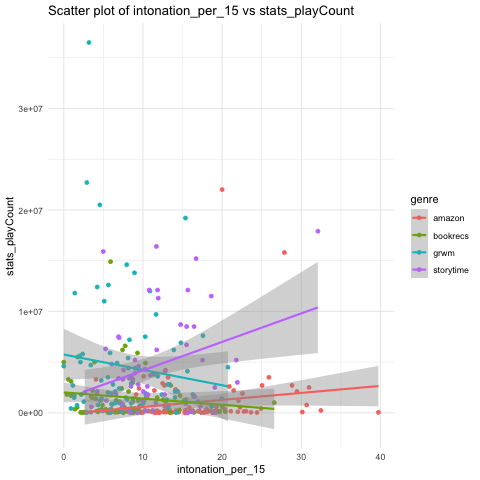

In [20]:
%%R -i df_combined

ggplot(df_combined,
       aes(x=intonation_per_15, y=stats_playCount, color=genre)) +
    geom_point() +
    geom_smooth(method='lm') +
    labs(title='Scatter plot of intonation_per_15 vs stats_playCount',
         x='intonation_per_15', y='stats_playCount') +

    theme_minimal()
     


In [26]:
%%R

#lm model
model <- lm(stats_playCount ~ intonation_per_15, data=df_combined)
summary(model)


Call:
lm(formula = stats_playCount ~ intonation_per_15, data = df_combined)

Residuals:
     Min       1Q   Median       3Q      Max 
-3078043 -2440031 -1607905   532072 33425822 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3209920     485955   6.605 1.67e-10 ***
intonation_per_15   -42680      36988  -1.154    0.249    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4407000

 on 318 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.00417,	Adjusted R-squared:  0.001038 
F-statistic: 1.331 on 1 and 318 DF,  p-value: 0.2494



In [34]:
%%R

#lm model
model <- lm(stats_playCount ~ intonation_per_15 + genre + author_uniqueId, data=df_combined)
summary(model)


Call:
lm(formula = stats_playCount ~ intonation_per_15 + genre + author_uniqueId, 
    data = df_combined)

Residuals:
     Min       1Q   Median       3Q      Max 
-5954904  -468744        0        0 18712897 

Coefficients: (2 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           -819952    1112226  -0.737 0.462198    
intonation_per_15                       69717      48701   1.432 0.154456    
genrebookrecs                         5819952    3157792   1.843 0.067393 .  
genregrwm                             1631623    5213309   0.313 0.754757    
genrestorytime                        2160207    3097083   0.697 0.486624    
author_uniqueId.eslis                 1577504    4179647   0.377 0.706417    
author_uniqueId.isaescu               5535861    5417815   1.022 0.308606    
author_uniqueId5u1mi                   464876    4181204   0.111 0.911628    
author_uniqueId_.lizethhhh    

In [24]:
%%R

#lm model
model <- lm(stats_playCount ~ intonation_per_15 + genre, data=df_combined)
summary(model)


Call:
lm(formula = stats_playCount ~ intonation_per_15 + genre, data = df_combined)

Residuals:
     Min       1Q   Median       3Q      Max 
-4799047 -1708482  -857091   430187 32213558 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         440377     779296   0.565    0.572    
intonation_per_15    35326      40714   0.868    0.386    
genrebookrecs    

   808226     715961   1.129    0.260    
genregrwm          3733711     689144   5.418 1.20e-07 ***
genrestorytime     3711881     691310   5.369 1.54e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4112000 on 315 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.141,	Adjusted R-squared:  0.1301 
F-statistic: 12.93 on 4 and 315 DF,  p-value: 9.265e-10



In [28]:
%%R

df_combined$genre = as.factor(df_combined$genre)

In [29]:
%%R

model <- lm(stats_playCount ~ intonation_per_15 + genre, data=df_combined)
summary(model)


Call:
lm(formula = stats_playCount ~ intonation_per_15 + genre, data = df_combined)

Residuals:
     Min       1Q   Median       3Q      Max 
-4799047 -1708482  -857091   430187 32213558 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         440377     779296   0.565    0.572    
intonation_per_15    35326      40714   0.868    0.386    
genrebookrecs       808226     715961   1.129    0.260    
genregrwm          3733711     689144   5.418 1.20e-07 ***
genrestorytime     3711881     691310

   5.369 1.54e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4112000 on 315 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.141,	Adjusted R-squared:  0.1301 
F-statistic: 12.93 on 4 and 315 DF,  p-value: 9.265e-10

